# Análisis de Estilo en Portafolios

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.picpedia.org/finance/images/stock-portfolio.jpg" width="400px" height="400px" />

> Al analizar si invertir o no en un portafolio (fondo de inversión), nos podríamos preguntar qué tan bueno es el administrador de dicho fondo.

> Bien, esto nos lleva a preguntarnos cómo es que se conforma un portafolio, cuál es el proceso mediante el cual se seleccionan los activos.

> Se puede consultar que los portafolios se venden con ciertas tendencias claramente marcadas (portafolios de compañías de alta capitalización, portafolios de compañías de baja capitalización, portafolios de compañías con baja diferencia de valor en libros y valor bursátil, ...).

> Entonces, surgen dos preguntas:
> 1. ¿Presenta en realidad el portafolio un comportamiento acorde al estilo que se promete?
> 2. Si los activos que conforman el portafolio pertenecen a un grupo selecto, ¿qué tan bueno es el administrador escogiendo dichos activos?

**Objetivos**

- Descomponer el exceso de rendimientos de un portafolio, en los *rendimientos debidos al estilo* y los *rendimientos debidos a la selección*.

- *rendimiento debido a la selección* = resta entre rendimiento del portafolio, y una mezcla pasiva de estilos similares.

**Solo el rendimiento debido a la selección se le puede atribuir al talento del administrador.**
___

## 1. Fundamentos básicos

- El análisis de estilo es una técnica poderosa y sofisticada para medir qué tan bueno es un administrador de fondos.

- Describe qué tan bueno es un administrador, analizando estadísticamente cómo los rendimientos del portafolio actúan, contra los rendimientos de lo que incluye el portafolio.

- En realidad nos interesa poco qué activos individuales contiene el portafolio. Más bien, miramos cómo se relaciona a diferentes estilos de inversión.

- Pero, ¿qué es un estilo de inversión?
 - Se puede pensar como un índice (método de inversión pasiva), o un *benchmark* (inversión base para comparar).
 
- Podemos pensar como si partiéramos el mercado en una matriz tres por tres, basados en la capitalización y en la diferencia entre valor en libros y valor de mercado.

|                                |                                |                               |
| ------------------------------ | ------------------------------ | ----------------------------- |
| Alta capitalización, Alta BM   | Alta Capitalización, Medio BM  | Alta Capitalización, Bajo BM  |
| Media capitalización, Alta BM  | Media Capitalización, Medio BM | Media Capitalización, Bajo BM |
| Baja capitalización, Alta BM   | Baja Capitalización, Medio BM  | Baja Capitalización, Bajo BM  |

- Entonces, por ejemplo, un administrador de fondos que invierte mayormente en activos de baja capitalización, diríamos que sigue un *estilo de baja capitalización*.

- Cabe destacar que estos no son los únicos estilos de inversión: también hay *estilo de bonos de gobierno*, por ejemplo.

Entonces, el análisis de estilo puede ser usado en varias formas:

1. Demostrar que un fondo de inversión sigue el objetivo que se plantea (si es de baja capitalización, etc)

2. Para descubrir cuál es el verdadero estilo de inversión del portafolio.

3. Evaluar que tan bueno es el administrador del fondo seleccionando los activos adecuados dentro del estilo prometido (valuación).

## 2. ¿Cómo se hace?

- Para explorar el funcionamiento del análisis de estilo, analizaremos el fondo **Vanguard Small-Cap Index Fund Admiral Shares (VSMAX)**.

- También necesitaremos los índices que marcan los diferentes estilos de inversión. Para ello usaremos las esquinas RUSSELL:
 - Russell 1000 Growth (^RLG)
 - Russell 1000 Value (^RLV)
 - Russell 2000 Growth (^RUO)
 - Russell 2000 Value (^RUJ)

Descarguemos datos diarios en los últimos 5 años.

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_datareader.data as web

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [4]:
# Nombres de instrumentos que vamos a importar
tickers = ['VSMAX', '^RLG', '^RLV', '^RUO', '^RUJ']
# Fechas de inicio y fin
start = "2017-01-01"

In [5]:
# Descargamos datos
closes = get_adj_closes(tickers=tickers, start_date=start)

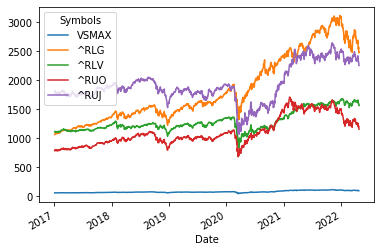

In [8]:
# Graficamos
closes.plot();

Obtenemos rendimientos

In [6]:
# Rendimientos diarios
ret = closes.pct_change().dropna()

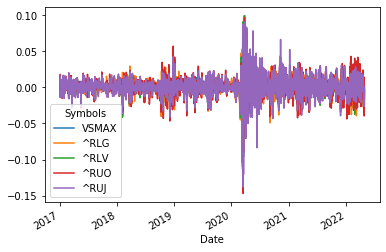

In [7]:
# Graficamos
ret.plot();

In [11]:
ret

Symbols,VSMAX,^RLG,^RLV,^RUO,^RUJ
Date,,,,,
2017-01-04,0.016401,0.007831,0.006017,0.017723,0.015305
2017-01-05,-0.007594,0.001476,-0.003639,-0.008513,-0.014267
2017-01-06,-0.001435,0.005978,0.000736,-0.002816,-0.003914
2017-01-09,-0.006226,-0.000343,-0.006833,-0.001266,-0.012515
2017-01-10,0.006908,0.000788,0.000253,0.008355,0.011285
...,...,...,...,...,...
2022-04-21,-0.021452,-0.019252,-0.012966,-0.026891,-0.019426
2022-04-22,-0.025744,-0.028681,-0.026182,-0.026940,-0.024256
2022-04-25,0.006503,0.012516,0.000426,0.014149,0.000730


El análisis de estilo no es más que una regresión lineal de los (excesos de) rendimientos del portafolio que se va a analizar (*variable dependiente*), respecto a los diferentes estilos de inversión (*variables independientes o explicativas*).

1. De forma que se asignan pesos (o ponderaciones) a cada uno de los estilos elegidos y una ponderación adicional como intercepto <font color=blue> (ver en el tablero)</font>.

 $$r_{p,t}=\alpha+w_1I_{1,t}+w_2I_{2,t}+\dots+w_nI_{n,t}+\epsilon_t,$$
 
 donde $\epsilon_t$ es el término de error (residual). Se incluye la restricción de que dichos pesos deben sumar uno (1), para interpretarlos como porcentajes:
 
 $$w_1+w_2+\dots+w_n=1.$$

2. Se calculan los residuales (error) al cuadrado en cada paso, y se minimiza el total: **mínimos cuadrados**.
 
 <font color=blue> (ver en el tablero)</font>.
 
 $$\min_{\alpha,w_1,\dots,w_n} \sum_{t=0}^T\epsilon_t^2=\sum_{t=0}^T\left(r_{p,t}-\alpha-w_1I_{1,t}-w_2I_{2,t}-\dots-w_nI_{n,t}\right)^2$$
 
 sujeto a $w_1+w_2+\dots+w_n=1.$

3. Calcular el estadístico $R$-cuadrado: en qué porcentaje la variación de los rendimientos de los índices explican la variación de los rendimientos del portafolio.

 $$R^2=1-\frac{var(\epsilon)}{var(r_p)}$$

Entonces, necesitamos un optimizador

In [9]:
# Importamos la librería optimize de scipy
from scipy.optimize import minimize

Debemos escribir la función a optimizar

In [10]:
# Función a minimizar (residuales)
def obj(coef, r_fondo, r_estilos):
    alpha = coef[0]
    w = coef[1:]
    modelo = alpha + r_estilos.dot(w)
    residuales = r_fondo - modelo
    return (residuales**2).mean()

Datos de entrada al optimizador

In [29]:
# Datos
r_fondo = ret['VSMAX']
r_estilos = ret[['^RLG', '^RLV', '^RUO', '^RUJ']]
coef0 = [0, 0.25, 0.25, 0.25, 0.25]

In [30]:
r_fondo.tail()

Date
2022-04-21   -0.021452
2022-04-22   -0.025744
2022-04-25    0.006503
2022-04-26   -0.030664
2022-04-27    0.000000
Name: VSMAX, dtype: float64

In [31]:
r_estilos.tail()

Symbols,^RLG,^RLV,^RUO,^RUJ
Date,,,,
2022-04-21,-0.019252,-0.012966,-0.026891,-0.019426
2022-04-22,-0.028681,-0.026182,-0.026940,-0.024256
2022-04-25,0.012516,0.000426,0.014149,0.000730
2022-04-26,-0.037358,-0.020167,-0.039622,-0.026421
2022-04-27,0.003214,0.000213,-0.005273,-0.001777


Restricciones

In [32]:
# Restricciones
cons = {'type': 'eq', 'fun': lambda coef: coef[1:].sum() - 1}

In [33]:
bnds = ((None, None),) + ((0, None),) * 4
bnds

((None, None), (0, None), (0, None), (0, None), (0, None))

Resolvemos

In [40]:
# Resolvemos
style = minimize(
    fun=obj,
    x0=coef0,
    args=(r_fondo, r_estilos),
    bounds=bnds,
    constraints=cons,
    tol=1e-10
)

In [41]:
style

     fun: 3.418257175111508e-06
     jac: array([1.61552774e-06, 1.47886647e-06, 4.63858618e-06, 2.17129363e-06,
       3.63533144e-06])
 message: 'Optimization terminated successfully.'
    nfev: 105
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([6.94105660e-05, 1.33435154e-01, 1.36762963e-01, 3.41748528e-01,
       3.88053355e-01])

In [42]:
alpha = style.x[0]
alpha

6.941056602129841e-05

In [43]:
# '^RLG', '^RLV', '^RUO', '^RUJ'
w = style.x[1:]
w

array([0.13343515, 0.13676296, 0.34174853, 0.38805335])

In [44]:
# Restricción
w.sum()

1.0

### ¿Qué podemos concluir?

 - Russell 1000 Growth (^RLG)
 - Russell 1000 Value (^RLV)
 - Russell 2000 Growth (^RUO)
 - Russell 2000 Value (^RUJ)

Entonces, el fondo **Vanguard Small-Cap Index Fund Admiral Shares (VSMAX)**, está conformado en un

In [45]:
# w_1
w[0]

0.133435154051672

por activos de alta capialización y con baja diferencia BM (Russell 1000 Growth); está conformado en un

In [47]:
# w_2
w[1]

0.13676296311556618

por activos de alta capitalización con alta diferencia BM (Russell 1000 Value); está conformado en un

In [48]:
# w_3
w[2]

0.34174852804312533

por activos de baja capitalización con baja diferencia BM (Russell 2000 Growth); y está conformado en un

In [50]:
# w_4
w[3]

0.3880533547896365

por activos de baja capitalización con alta diferencia BM (Russell 2000 Value). El restante

In [51]:
# alpha
alpha

6.941056602129841e-05

de los rendimientos diarios, **es atribuible al administrador del fondo por la selección particular de los activos.**

Por tanto, **el estilo predominante del fondo es de baja capitalizacion** ($\approx 70\%$).

Calculamos el $R^2$

In [52]:
# Calculamos residuales (error)
residuales = r_fondo - (alpha + r_estilos.dot(w))

In [53]:
# Calculamos Rsq
Rsq = 1 - np.var(residuales) / np.var(r_fondo)
Rsq

0.9832871625857185

Estadísticamente, el modelo propuesto explica el $98.33\%$ de la variación total de los rendimientos del portafolio.

Gráficamente

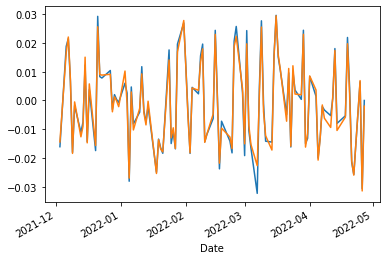

In [55]:
# Graficar los rendimientos del portafolio y los que se obtendrían con los índices
r_fondo.iloc[-100:].plot()
(alpha + r_estilos.dot(w)).iloc[-100:].plot()

# Anuncios parroquiales

## 1. Ver clase 0 para revisar objetivos.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>